# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset.
 The dataset provided contains the following variables:
 
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [5]:
# Read in the data set
housing_data = pd.read_csv('ames.csv')

In [6]:
# Clean and pre-process the data if neccessary
# Reading from the information above, all area measurements were done in square foot and all the sale prices
# were recorded in dollars, which means scaling of data is not necessary
# Here I am exploring the data to see if any other forms of cleaning or preprocessing is necessary
print(housing_data.shape)
housing_data.head(10)

(2930, 14)


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900
5,1998,1998,926,926,678,1604,2,1,3,1,7,1,470,195500
6,2001,2001,1338,1338,0,1338,2,0,2,1,6,0,582,213500
7,1992,1992,1280,1280,0,1280,2,0,2,1,5,0,506,191500
8,1995,1996,1595,1616,0,1616,2,0,2,1,5,1,608,236500
9,1999,1999,994,1028,776,1804,2,1,3,1,7,1,442,189000


In [7]:
# I am also going to see if there is any missing values and what the data type of each column is
missing_value_count = housing_data.isnull().sum()
print(missing_value_count)
# Judging by the output, there are no missing values throughout the dataset and the data type also 
# seems consistent throughout, all the data is integer

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


In [8]:
# I have created a for loop to see the maximum and minimum value in each column
# I am trying to see if there are any outliers that can lead to unreliable results
for column in housing_data.columns:
    max_value = housing_data[column].max()
    min_value = housing_data[column].min()
    print(f"Column: {column}, maximum value: {max_value}, minimum value: {min_value} ")
# Judging by the results, some variables such as Total_Bsmt_SF and Second_Flr_SF have a very big range, from 0 to 6110 and 
# from 0 to 2065 respectively, but that can just indicate the abscence of a basement or a second floor in some houses.
  

Column: Year_Built, maximum value: 2010, minimum value: 1872 
Column: Year_Remod_Add, maximum value: 2010, minimum value: 1950 
Column: Total_Bsmt_SF, maximum value: 6110, minimum value: 0 
Column: First_Flr_SF, maximum value: 5095, minimum value: 334 
Column: Second_Flr_SF, maximum value: 2065, minimum value: 0 
Column: Gr_Liv_Area, maximum value: 5642, minimum value: 334 
Column: Full_Bath, maximum value: 4, minimum value: 0 
Column: Half_Bath, maximum value: 2, minimum value: 0 
Column: Bedroom_AbvGr, maximum value: 8, minimum value: 0 
Column: Kitchen_AbvGr, maximum value: 3, minimum value: 0 
Column: TotRms_AbvGrd, maximum value: 15, minimum value: 2 
Column: Fireplaces, maximum value: 4, minimum value: 0 
Column: Garage_Area, maximum value: 1488, minimum value: 0 
Column: Sale_Price, maximum value: 755000, minimum value: 12789 


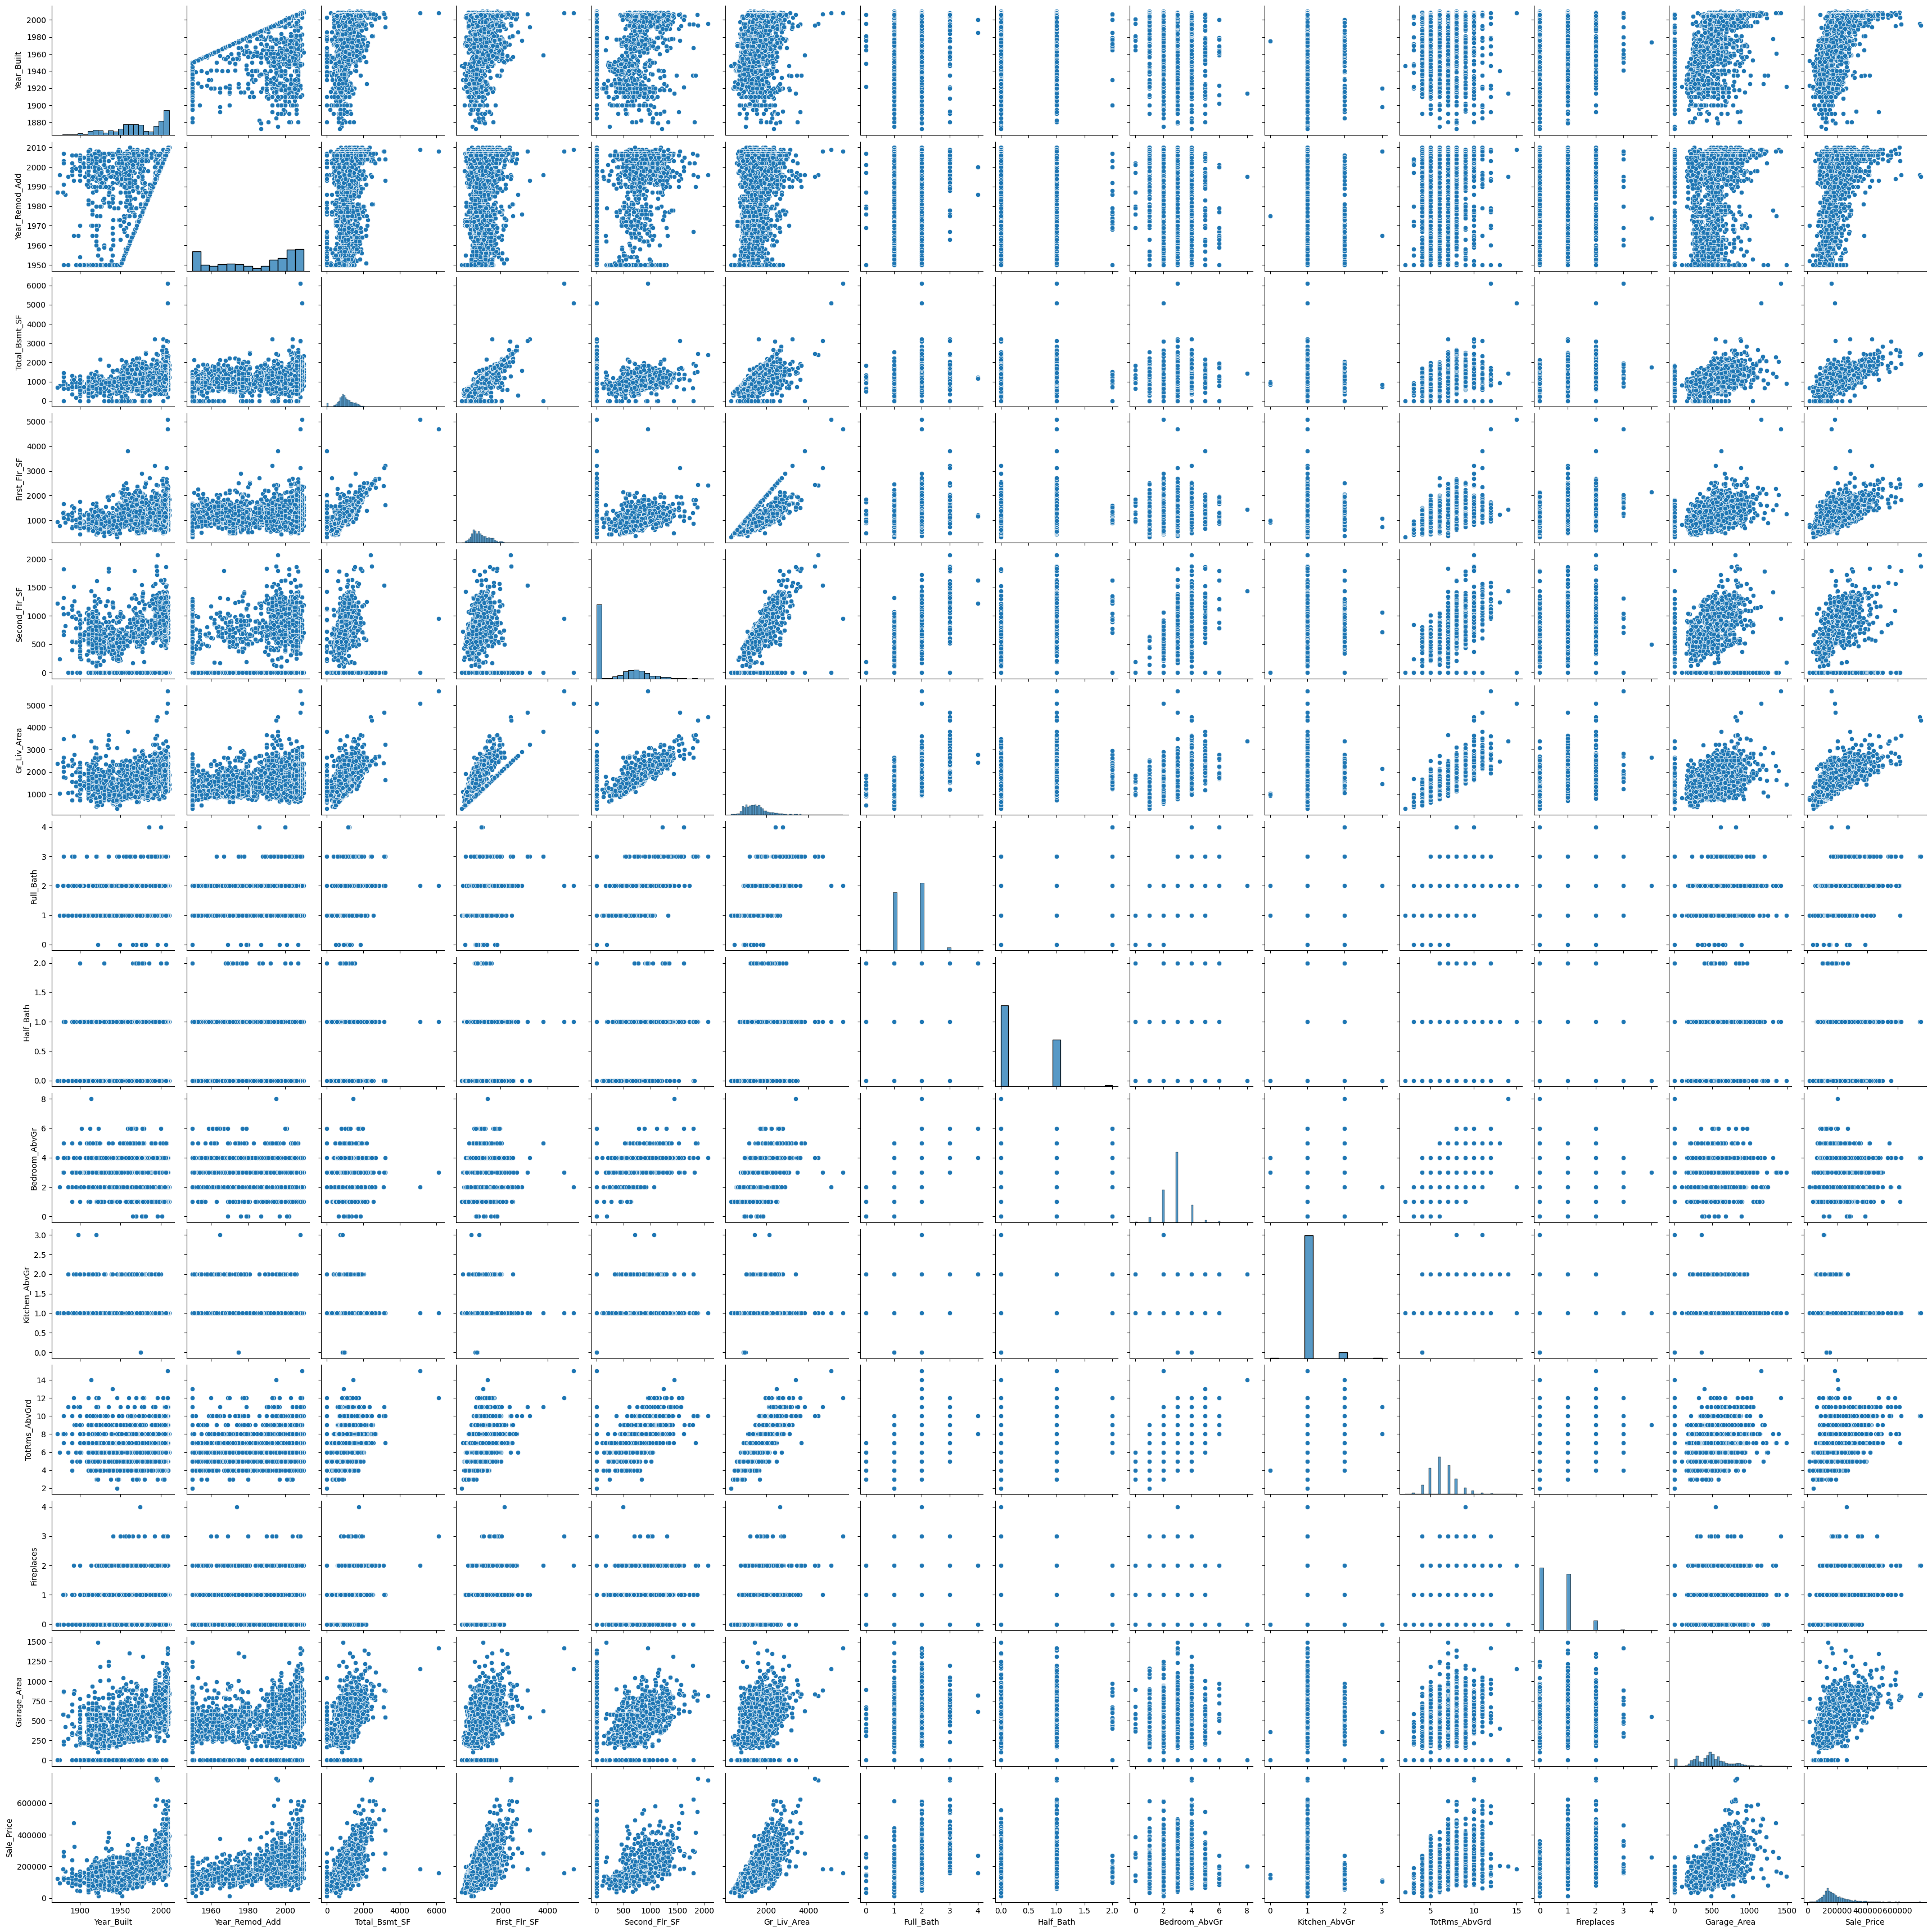

In [9]:
# Explore the data with visualisations such as histograms and correlation matrices
# First I will plot the data of the independent variables to see how they are distributed
sns.pairplot(data=housing_data)

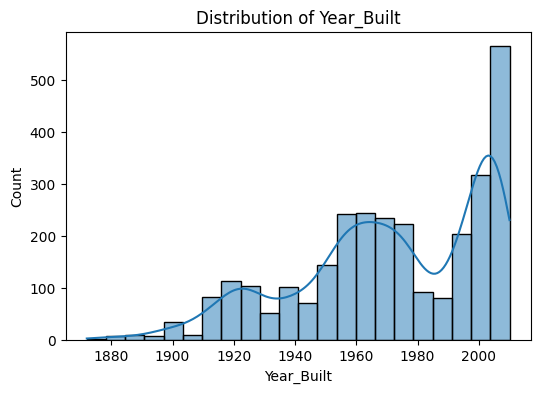

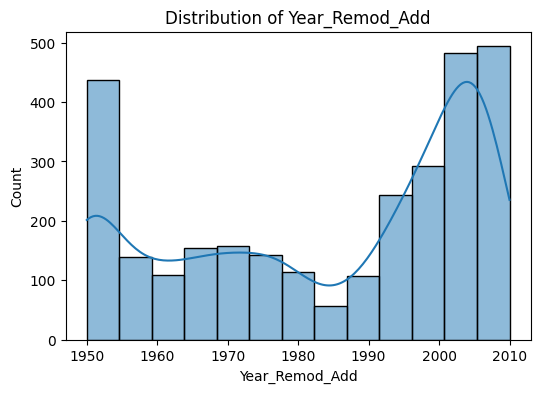

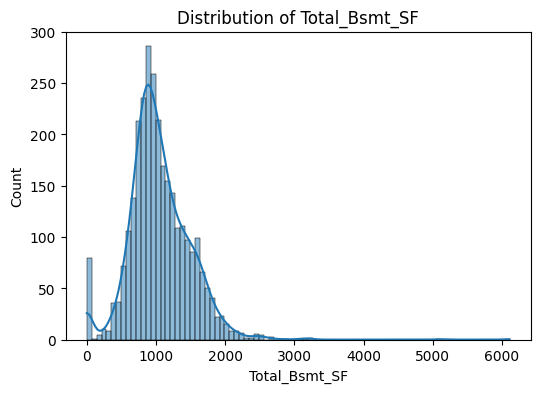

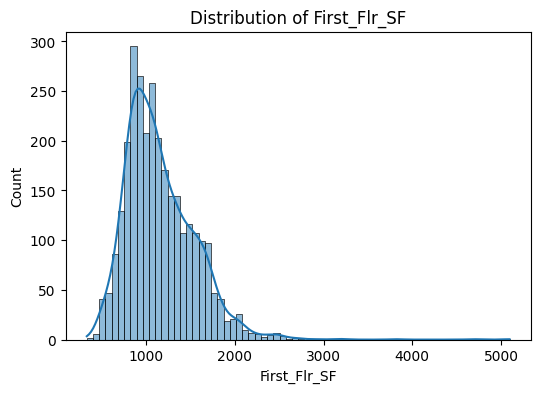

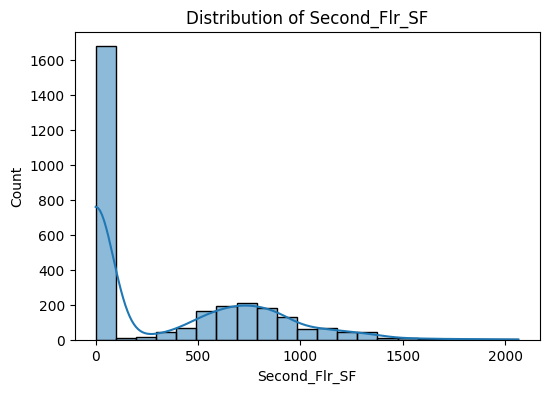

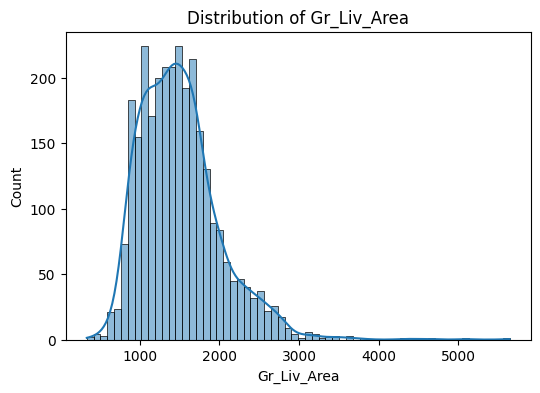

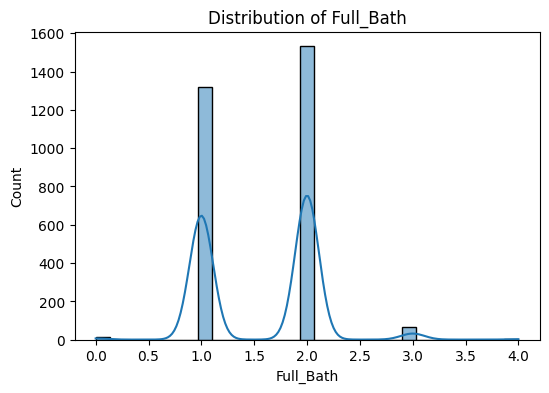

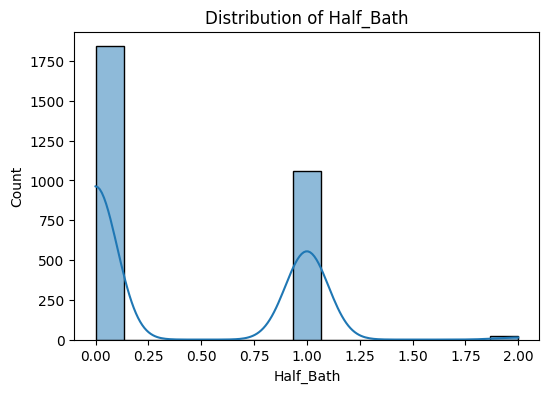

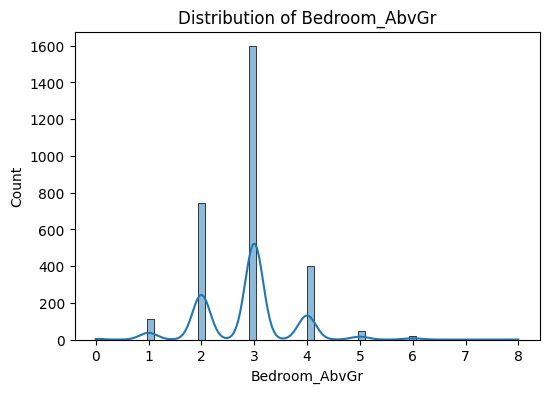

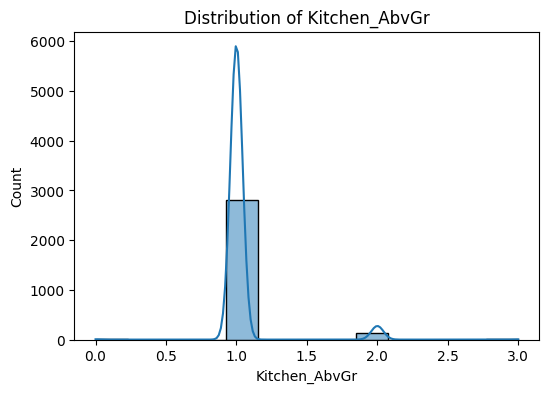

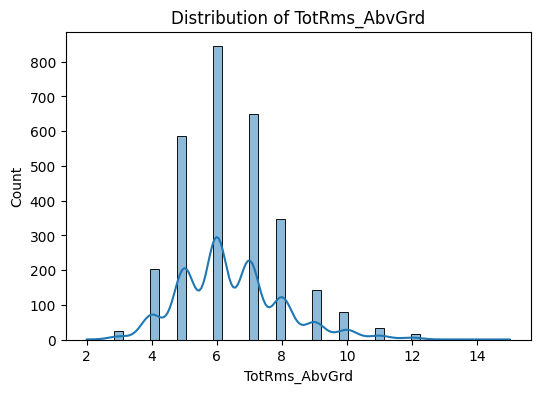

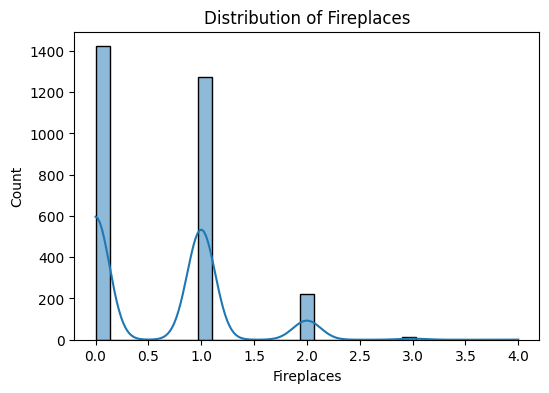

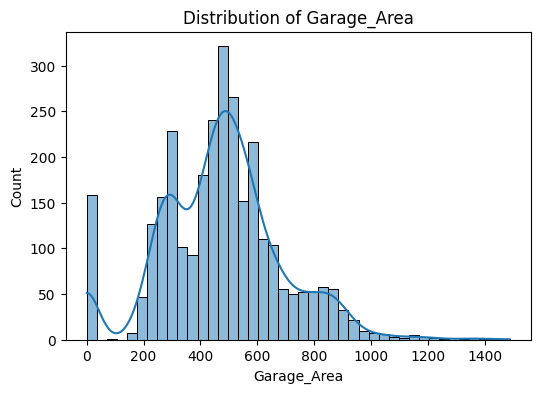

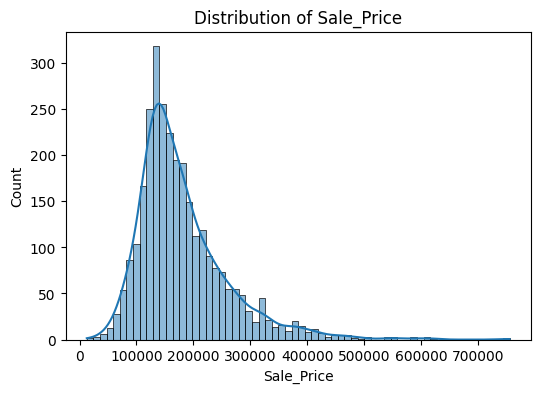

In [10]:
# In order to get a closer look at each of the graphs to decide which scaling method to use
# I have used a for loop below to make individual graphs for each column
for column in housing_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(housing_data[column], kde = True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [11]:
# Split the independent variables from the dependent variable
X = housing_data[['Gr_Liv_Area', 'Garage_Area']]
y = housing_data['Sale_Price']

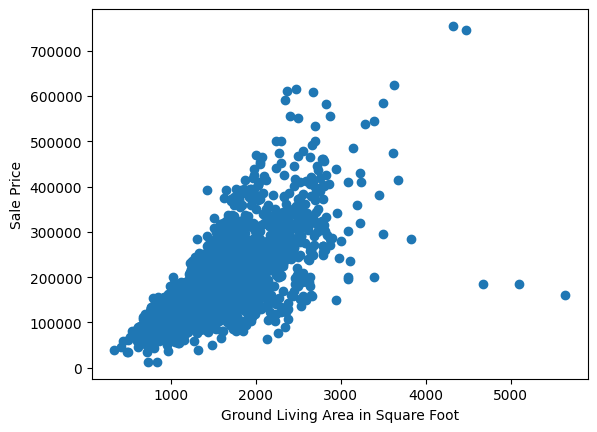

In [20]:
# Explore relationships between the independent and dependent variables
plt.figure()
plt.scatter(housing_data['Gr_Liv_Area'], housing_data['Sale_Price'] )
plt.xlabel('Ground Living Area in Square Foot')
plt.ylabel('Sale Price')

# Save the graph
plt.savefig('ground_living_area_vs_sale_price.png')
plt.show()
plt.close()

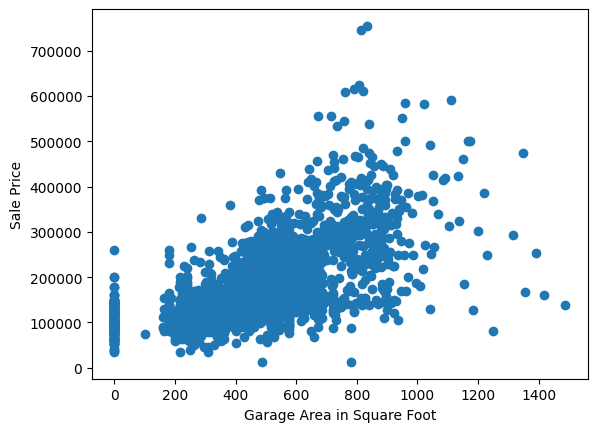

In [21]:
plt.figure()
plt.scatter(housing_data['Garage_Area'], housing_data['Sale_Price'] )
plt.xlabel('Garage Area in Square Foot')
plt.ylabel('Sale Price')

# Save the graph
plt.savefig('garage_area_vs_sale_price.png')
plt.show()
plt.close()

In [27]:
# Create a training and test set with a 75:25 split ratio
r_seed = 23 # Setting a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=r_seed)

print ("Training data:",X_train.head(), y_train.head())
print ("Test data:",X_test.head(), y_test.head())

Training data:       Gr_Liv_Area  Garage_Area
1088         1456          400
2208          954          240
2925         1003          588
1590         1092            0
953          1217          497 1088    176000
2208    119750
2925    142500
1590    146000
953     173000
Name: Sale_Price, dtype: int64
Test data:       Gr_Liv_Area  Garage_Area
2233          803          360
1735         1302          436
1912         1254          525
1513          864            0
1764         3078          806 2233     87000
1735    176485
1912    158500
1513     98000
1764    410000
Name: Sale_Price, dtype: int64


In [25]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
# Print the model intercept and coefficients
print('Intercept: ', lm.intercept_)
print('Coefficient: ', lm.coef_)

Intercept:  -15408.300576936657
Coefficient:  [ 86.00612276 143.47756103]


In [28]:
# Generate predictions for the test set
y_predictions = lm.predict(X_test)
y_predictions[0:5]

array([105306.53797291, 159127.88786951, 167769.09690901,  58900.98948901,
       364961.45947664])

In [29]:
# Evaluate the model
# I am going to evaluate the model by calculating the mean squared error value
from sklearn.metrics import mean_squared_error
mse_value = mean_squared_error(y_test, y_predictions)
print(f"The mean squared error value is: {mse_value}")


The mean squared error value is: 2835241787.2883654


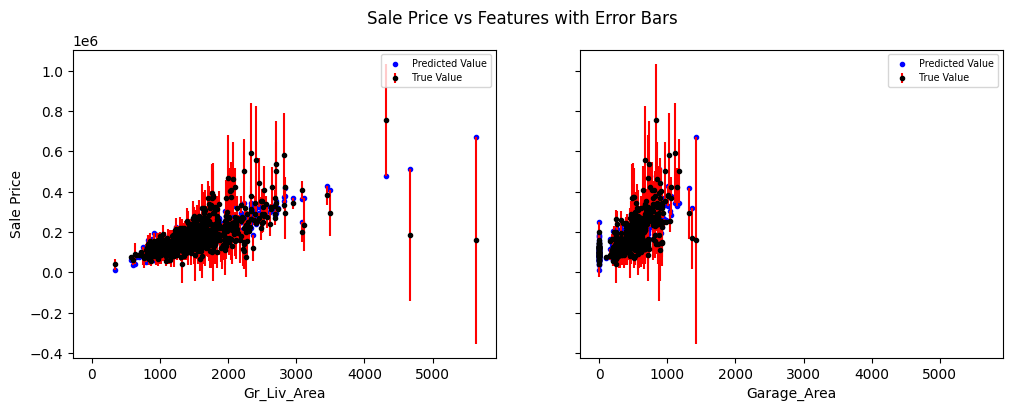

In [30]:
# Creating an error plot
# I am firstlt creating a figure and a set of subplots, with 1 row and with the number of columns equal to the
# number of features in X_test
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(12, 4))
fig.suptitle("Sale Price vs Features with Error Bars")
ax[0].set_ylabel('Sale Price')

# Get the absolute errors for error bars
error_bar_values = np.abs(y_test.values - y_predictions)

# Plot data, predicted values, and error bars
# I have used a for loop to create a graph for each feature in X_test and used enumerate() to index
for i, feature in enumerate(X_test.columns):
    ax[i].errorbar(X_test[feature], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True Value')
    ax[i].scatter(X_test[feature], y_predictions, c='b', marker='.', label='Predicted Value')
    ax[i].set_xlabel(feature)
    ax[i].legend(loc='best', fontsize='x-small')

# Save the figure 
plt.savefig('error_bars_plot.png')

In [ ]:
# Print the coefficients
# I have used np.median to calculate the median value of y_predictions
median_value_prediction = np.median(y_predictions)
print(f"The median of the predicted values is {median_value_prediction}")
# Here I have used the zip() function to pair each column with the corresponding coefficient
coefficients = lm.coef_
# I am using a for loop to loop through each feature and X_test and the corresponding coeffcient and print them out
# with 2 decimal places
for feature, coef in zip(X.columns, coefficients):
    print(f"The coefficient for {feature} is {coef:.2f}.")


The median of the predicted values is 176014.0246845467
The coefficient for Gr_Liv_Area is 86.01.
The coefficient for Garage_Area is 143.48.


**Interpret coefficients in the context of the prediction:**
In the context of the median predicted value, the coefficient for Gr_Liv_Area means that for every 1 square foot of increase in the size of the ground living area, the median predicted sale price will go up by 86.01 dollars; similarly, the coefficient for Garage_Area means that for every 1 square foot of increase in the size of the garage area, the median predicted sale price will increase by 143.48 dollars.

**Summarise findings**
In summary, these are the few main points to pay attention to:
1) Through explanatory analysis, the dataset seems to have no missing value or require scaling, which means it is ready to be analysed
2) Juding by the diagrams, none of the independent variables seem to be normally distributed, or seem to follow the Gaussian distribution
3) The relationship between ground living area in sqaure foot and sale price and the relationship between garage area and sale price can both be defined as positive correlations. The positive correlation between the ground livign area and sale price is stronger according to the diagrams.
4) The MSE value is pretty large but considering the range of sale price, which, is in the range of hundreds of thousands, the large MSE value might not be a major concern.
5) An MSE of roughly 2.8 billion corresponds to an average squared error value of around 53,000 per prediction, which can be regarded as reasonable
5) Looking at at the error bar plots, most of the predicted values are proximal to the true values, but the predicted values for the outliers can be further away from the true values.